# Introduction

We search for insights in our datasets to determine the good classes and have so many idea about how to use them

## Food and Nutrition

![Nutrition Image](https://images.unsplash.com/photo-1498837167922-ddd27525d352?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=750&q=80)



This notebook analyses the most common available foods and the nutritional facts in them.

# Data Preprossing

Data Importation and Data cleaning is always the first step in any data science project. Although the data here seems clean, some minor alterations are required.

In [24]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:

df=pd.read_csv("../artifacts/data/01-Food-Classes/food.csv")
df.head()

,Unnamed: 0,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,0,Cows' milk,1 qt.,976,660.0,32,40,36.0,0.0,48.0,Dairy
1,1,Milk skim,1 qt.,984,360.0,36,0,0.0,0.0,52.0,Dairy
2,2,Buttermilk,1 cup,246,127.0,9,5,4.0,0.0,13.0,Dairy
3,3,Evaporated undiluted,1 cup,252,345.0,16,20,18.0,0.0,24.0,Dairy
4,4,Fortified milk,6 cups,1419,1373.0,89,42,23.0,1.4,119.0,Dairy


In [ ]:
nutrients=nutrients.replace(",","", regex=True)
nutrients['Fiber']=nutrients['Fiber'].replace("a","", regex=True)
nutrients['Calories'][91]=(8+44)/2

Now, let us convert grams, calories, protein, fat, saturated fat, fiber and carbs datatypes to int.

In [ ]:
nutrients['Grams']=pd.to_numeric(nutrients['Grams'])
nutrients['Calories']=pd.to_numeric(nutrients['Calories'])
nutrients['Protein']=pd.to_numeric(nutrients['Protein'])
nutrients['Fat']=pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat']=pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber']=pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'])

In [4]:
df.dtypes

Unnamed: 0      int64
Food           object
Measure        object
Grams           int64
Calories      float64
Protein         int64
Fat             int64
Sat.Fat       float64
Fiber         float64
Carbs         float64
Category       object
dtype: object

Nice, all our data is in desired datatypes.

## Quick last checks on data quality

In [5]:
print(df.isnull().any())
print('-'*245)
print(df.describe())
print('-'*245)

Unnamed: 0    False
Food          False
Measure       False
Grams         False
Calories       True
Protein       False
Fat           False
Sat.Fat        True
Fiber          True
Carbs         False
Category      False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       Unnamed: 0        Grams     Calories     Protein         Fat  \
count    335.0000   335.000000   334.000000  335.000000  335.000000   
mean     167.0000   143.211940   188.802395    8.573134    8.540299   
std       96.8504   138.668626   184.453018   17.733722   19.797871   
min        0.0000    11.000000     0.000000   -1.000000    0.000000   
25%       83.5000    60.000000    75.000000    1.000000    0.000000   
50%      167.0000   108.000000   131.000000    3.000000    1.000000   
75%      250.5000   200.0

There's a null value in the fiber column, lets drop that row entirely.

In [6]:
df=df.dropna()
df.shape

(331, 11)

# Data Visualization and Analysis

What is the most protein rich food in the category of vegetables and Fruits?

In [9]:

alls=['Vegetables',
 'Fruits']

prot= df[df['Category'].isin(alls)]

protein_rich= prot.sort_values(by='Protein', ascending= False)
top_20=protein_rich.head(20)
fig = px.bar(top_20, x='Food', y='Protein', color='Protein', title=' Top 10 protein rich foods')
fig.show()

Therefore, from the category of Grains, Vegetables and Seeds, whole wheat has the most protein content followed by white bread. Soybeans are also in the top 20s. Also, Almonds rank no. 1 in the Seeds category.🌱

## Foods to stay away from:

What food has the most calories?

In [10]:
cals= df.sort_values(by='Calories', ascending= False)
top_20_cals=cals.head(20)
fig = px.bar(top_20, x='Food', y='Calories' , color='Calories',title=' Top 10 calorie rich foods')
fig.show()

Fortified milk has the most calories, followed by white bread. Also, notice how whole wheat has the most proteins but has almost equal amount of calories. Lard is fat source with most calories and 1/2 cup of ice-creams tops the charts in the dessert category.

## Fat Content:

Normally, fat sources are often looked down upon. But, a certain amount of fat is required for a healthy gut.
Let's look at some fatty foods.



In [11]:
fats= df.sort_values(by='Fat', ascending= False)
top_20_fat=fats.head(20)
fig = px.bar(top_20_fat, x='Food', y='Calories', color='Calories', title=' Fat Content and Calories')
fig.show()

Therefore, Oysters and Butter have the largest combination of calories and fats, followed by lard.

## Analysing categories

Grouping the data into categories can give us the total count of all metrics and thus we can analyse the categories.

In [12]:
category_dist=df.groupby(['Category']).sum()
category_dist

C:\Users\P52s\AppData\Local\Temp\ipykernel_26704\4238177051.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Unnamed: 0,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,,
Beverages,3942,3284,1112.0,0,0,0.0,0.00,167.0
Dairy,378,7412,8434.0,503,396,322.0,4.40,651.0
Fats,483,695,3629.0,234,631,536.0,234.00,239.0
Fish Seafood,1458,1807,2757.0,588,338,252.0,235.00,263.0
Fruits,10991,11229,8610.0,64,46,33.0,72.00,2151.0
Jams Jellies,2402,422,1345.0,0,0,0.0,8.00,345.0
Meat Poultry,1653,2724,7529.0,546,520,427.0,0.00,57.3
Seeds-nuts,3798,682,4089.0,120,368,232.0,18.60,140.0
Soups,2685,2495,1191.0,59,41,43.0,4.00,155.0


In [13]:
category_dist=df.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()

C:\Users\P52s\AppData\Local\Temp\ipykernel_26704\4136009117.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### Some inferences from the above pie charts:

* It is clear that breads, grains and cereals have the highest amount of Carbs and Calories.

* Largest percentage of protein is in seafood (God bless the vegetarians!)

* Surprisingly, same amount of fiber content is present in Fats and Seafood.

* Seeds and nuts have about 14% fat content.

* Fruits do not have a large percentage in any of the categories except carbs, they have about 10% carbohydrates.

* Dairy products (15%) have more saturated fat content than seafood (11.8%).

## Analyzing the Drinks, Alcohol, Beverages and Desserts

Since it is clear that meat/ seafood have an abundance of protein, let us find the protein rich foods.

In [17]:
drinks= df[df['Category'].isin(['Fish Seafood','Sweets'])]
drinks_top=drinks.sort_values(by='Calories', ascending= False)
drinks_top=drinks_top.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_top['Calories'].values, text=drinks_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "teal", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))



fig.show()

So, pudding has the most amount of calories followed by chocolate fudge.

In [18]:
drinks_fatty=drinks.sort_values(by='Fat', ascending= False)
drinks_fatty=drinks_fatty.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_fatty['Fat'].values, text=drinks_fatty['Food'],
                              title = { "text": "Desserts with high fat percentage"},
               marker = {"colors": ["blue", "purple", "pink", "teal", "silver","yellow", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

Pies and fudges have the highest percentage of fat as well.

## Analyzing meat, poultry , seafood.

In [19]:
meat= df[df['Category'].isin(['Fish Seafood','Meat Poultry'])]
meats_top=drinks.sort_values(by='Protein', ascending= False)
meats_top=meats_top.head(10)

fig = go.Figure(go.Pie(values=meats_top['Protein'].values, text=meats_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["maroon", "salmon", "tan", "gold", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

Oysters have a large amount of proteins, after them the flatfish flounders have about 6.59% protein.

## Seafood and meat always is known for having good fat content. Let's find out the fattiest of the fishes.🐟

In [20]:
top_10_fattest= meat.sort_values(by='Fat', ascending=False)
top_10_fattest=top_10_fattest.head(10)
fig = go.Figure(data=[go.Scatter(
    x=top_10_fattest['Food'], y=top_10_fattest['Fat'],
    mode='markers',
    marker_size=[200,180,160,140,120, 100 ,80 , 60 ,40,20])
])
fig.update_layout(title='Meat/Seafood with high Fat Content')
fig.show()

So, only have high protein as well as high fat percentage. Pork sausages are the second highest followed by Roast beef. Also, no type of fish is present in the top 10 fattiest meats list. So, fishes tend to have less fat, I suppose.

## Lastly, let us find the meat with most fiber

In [21]:
top_10_fibrous= meat.sort_values(by='Fiber', ascending=False)
top_10_fibrous=top_10_fibrous.head(10)
top_10_fibrous

,Unnamed: 0,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
82,82,Oysters,6-8 med.,230,231.0,232,233,234.0,235.0,236.0,Fish Seafood
43,43,Bacon,2 slices,16,95.0,4,8,7.0,0.0,1.0,Meat Poultry
78,78,Halibut,3 1/2 oz.,100,182.0,26,8,0.0,0.0,0.0,Fish Seafood
69,69,Turkey,3 1/2 oz.,100,265.0,27,15,0.0,0.0,0.0,Meat Poultry
70,70,Veal,3 oz.,85,185.0,23,9,8.0,0.0,0.0,Meat Poultry
71,71,Roast,3 oz.,85,305.0,13,14,13.0,0.0,0.0,Meat Poultry
72,72,Clams,3 oz.,85,87.0,12,1,0.0,0.0,2.0,Fish Seafood
73,73,Cod,3 1/2 oz.,100,170.0,28,5,0.0,0.0,0.0,Fish Seafood
74,74,Crab meat,3 oz.,85,90.0,14,2,0.0,0.0,1.0,Fish Seafood
75,75,Fish sticks fried,5,112,200.0,19,10,5.0,0.0,8.0,Fish Seafood


Bacon, Halibut, Turkey and veal top the charts in terms of Fiber content.

## Introducing 3D Scatter Plots

3D scatter plots are used to plot data points on three axes in the attempt to show the relationship between three variables. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X, Y, and Z axes. Basically, Plotting some data on the z-axis of a normal x-y scatter plot like the previous figure.

They are interesting and though may not provide much inferences, are visually appealing to look at.

In [22]:
trace1 = go.Scatter3d(
    x=df['Category'].values,
    y=df['Food'].values,
    z=df['Fat'].values,
    text=df['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = df['Fat'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Fatty foods (% Daily Value)')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [23]:
trace1 = go.Scatter3d(
    x=df['Category'].values,
    y=df['Food'].values,
    z=df['Carbs'].values,
    text=df['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = df['Carbs'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Carbohydrate rich food')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

## Food group with the most calorie content

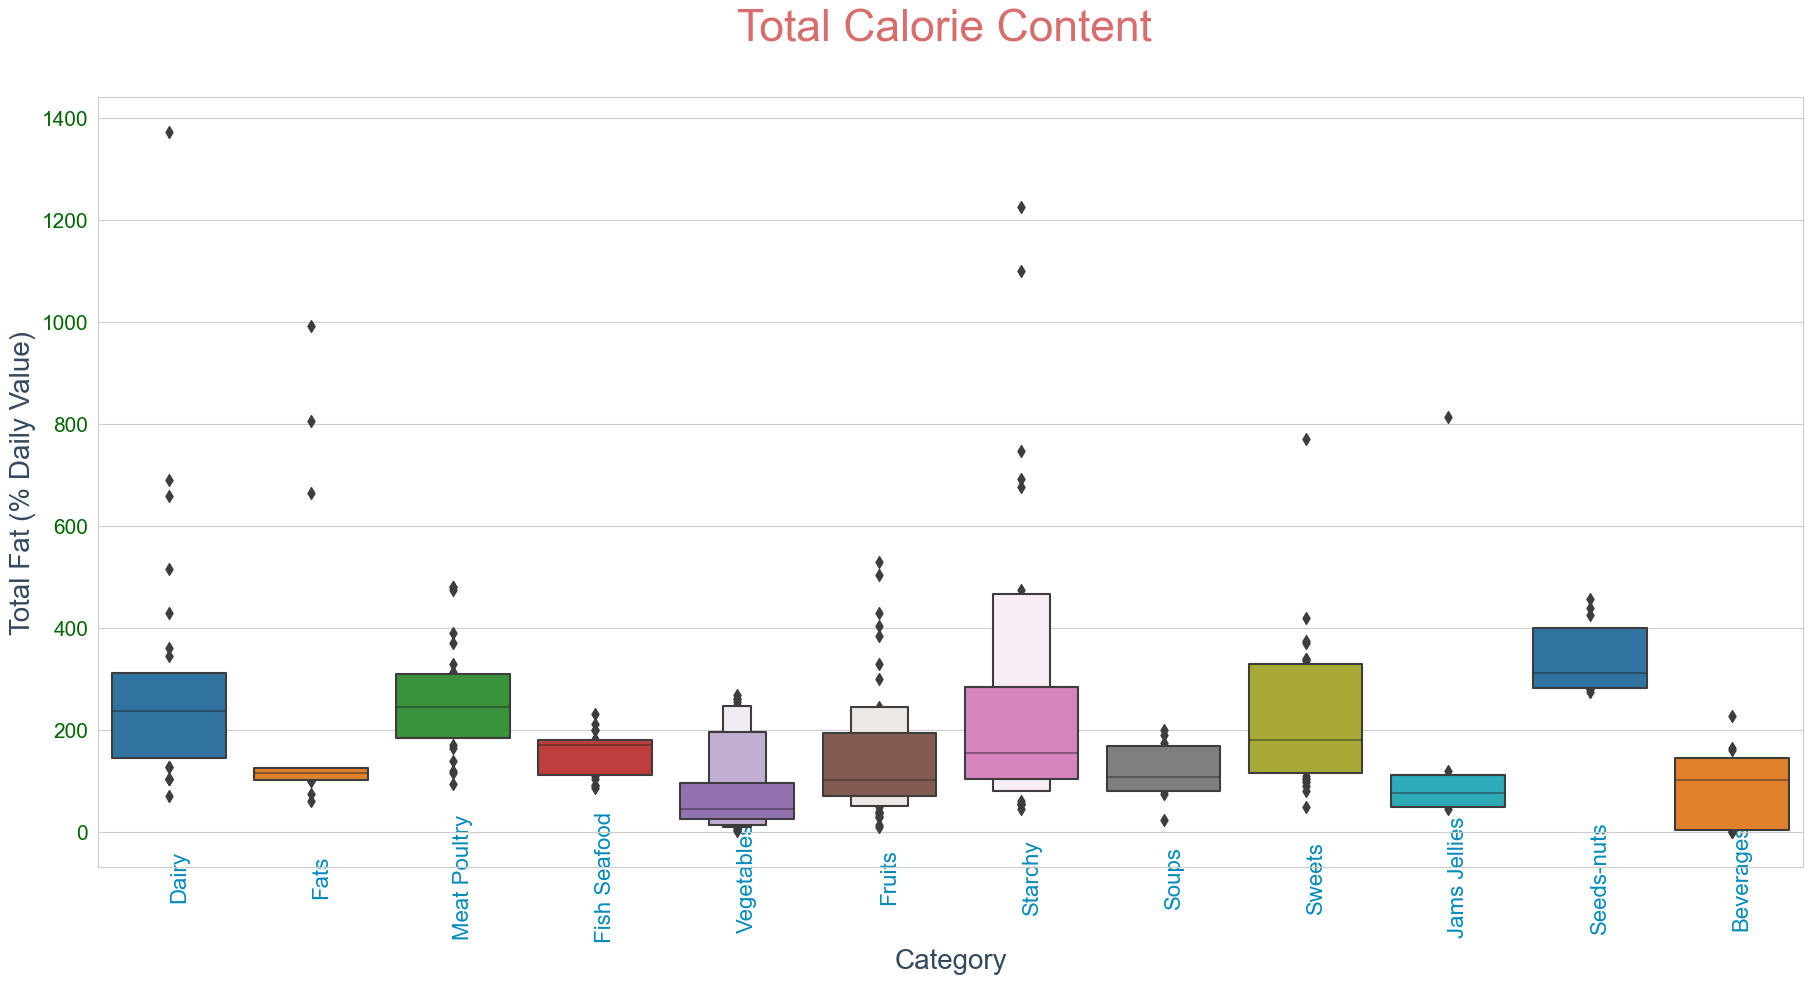

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Calories', data=df, color='#eeeeee', palette="tab10")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Total Calorie Content \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Total Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation=90, wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()


This notebook was an attempt to visualize data that is a part of every single person's life and analysing our basic needs in terms of nutrients. Upvote if you like it and share possible improvements in the comments.